<a href="https://colab.research.google.com/github/peronvidal/tp-grupal-3-marias/blob/master/An%C3%A1lisis_modelo_arbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_model = LinearRegression()
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [77]:
# Instalar paquetes en entorno virtual
# import sys
# !{sys.executable} -m pip install pandas matplotlib scikit-learn seaborn numpy 

In [78]:
!wget https://github.com/peronvidal/tp-grupal-3-marias/raw/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx

--2023-06-12 18:07:11--  https://github.com/peronvidal/tp-grupal-3-marias/raw/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 

20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/peronvidal/tp-grupal-3-marias/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx [following]
--2023-06-12 18:07:12--  https://raw.githubusercontent.com/peronvidal/tp-grupal-3-marias/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495977 (484K) [application/octet-stream]
Saving to: ‘intervenciones-de-seguridad-clean.xlsx.1’

intervenciones-de-s 100%[===================>] 484,35K  1,13MB/s    in 0,4s    

2023-06-12 18:07:13 (1,13 MB/s) - ‘intervenciones-de-segu

In [79]:
df = pd.read_excel('intervenciones-de-seguridad-clean.xlsx')

In [80]:

## Aca se agregan columnas con datos relacionados a fechas
df['fecha_original'] = df['fecha']
df['fecha'] = pd.to_datetime(df['fecha']) # todas las fechas a datetime de pandas
df['year'] = pd.DatetimeIndex(df['fecha']).year
df['month'] = pd.DatetimeIndex(df['fecha']).month
df['day'] = pd.DatetimeIndex(df['fecha']).month
# Define a function to apply the condition
def condition(row):
    if row['lesionados'] > 0 or row['fallecidos']>0:
        return 1
    else:
        return 0

# Apply the function to create a new column
# df['NewColumn'] = df.apply(lambda row: condition(row), axis=1)

df['heridos_o_fallecidos'] = df.apply(lambda row: condition(row), axis=1)
df.loc[df['moto'] > 0, 'moto'] = 1
df.loc[df['liviano'] > 0, 'liviano'] = 1
df.loc[df['bus'] > 0, 'bus'] = 1
df.loc[df['camion'] > 0, 'camion'] = 1

In [81]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(data=df, columns=['condiciones_meteorologicas','autopista','superficie_de_la_via','moto','liviano','camion','bus'])
X = pd.concat([X,df[['month','day']]],axis=1)
y = df['heridos_o_fallecidos']
X = X.drop(["heridos_o_fallecidos","fecha","pk","banda_y_o_ramal","lesionados","fallecidos","year","fecha","tipo_de_siniestro","hora","fecha_original"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
# bolsa de sueños: una forma mas facil de conseguir solo los dummies

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import numpy as np

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4,5,6,7],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Create a KFold object for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=kfold)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best estimator
best_clf = grid_search.best_estimator_



Best Parameters:  {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.7618348200440648


In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier(criterion='gini',max_depth=1, min_samples_leaf=1, min_samples_split=2)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud:", accuracy)

from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(confusion_mat)

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precisión:", precision)
recall = recall_score(y_test, y_pred)
print("Exhaustividad:", recall)
f1 = f1_score(y_test, y_pred)
print("Valor-F:", f1)



Exactitud: 0.7598971722365039
Matriz de confusión:
[[965 141]
 [326 513]]
Precisión: 0.7844036697247706
Exhaustividad: 0.6114421930870083
Valor-F: 0.6872069658405894


In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


# Crear el pipeline con los pasos de preprocesamiento y el modelo
pipeline = Pipeline([
    ('preprocessing', StandardScaler()),  # Paso de preprocesamiento: escalamiento de características
    ('model', DecisionTreeClassifier(criterion='gini',max_depth=1, min_samples_leaf=1, min_samples_split=2))  # Paso del modelo: Regresión Logística
])

# Realizar la validación cruzada con el pipeline
accuracy = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')
recall =cross_val_score(pipeline, X, y, cv=10, scoring='recall')
# Imprimir los resultados de la validación cruzada
print("Scores de validación cruzada:", accuracy)
print("Promedio del score accuracy:", accuracy.mean())
print("Scores de validación cruzada:", recall)
print("Promedio del score recall:", recall.mean())
# chart of acurracy and recall
# https://www.kaggle.com/kevinarvai/fine-tuning-a-classifier-in-scikit-learn

# cross_val


Scores de validación cruzada: [0.74935733 0.77506427 0.7622108  0.70051414 0.75192802 0.7403599
 0.77763496 0.81209781 0.79279279 0.75160875]
Promedio del score accuracy: 0.7613568765239715
Scores de validación cruzada: [0.55855856 0.64156627 0.63253012 0.54216867 0.68072289 0.67771084
 0.7560241  0.70783133 0.60843373 0.55421687]
Promedio del score recall: 0.6359763377835665


In [94]:

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=20, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [86]:
grid_search_clf = grid_search_wrapper(refit_score='f1_score')

Best params for f1_score
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

Confusion matrix of Random Forest optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       965       141
pos       326       513


In [87]:
# results = pd.DataFrame(grid_search_clf.cv_results_)
# grid_search_clf.cv_results_
# results = results.sort_values(by='mean_test_precision_score', ascending=False)
# results

In [95]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[[
    'mean_test_precision_score'
    ,'mean_test_recall_score'
    ,'mean_test_accuracy_score'
    ,'mean_test_f1_score'
    ,'param_max_depth'
    ,'param_criterion'
    ,'param_min_samples_split'
    ,'param_min_samples_leaf'
    
    # ,'param_max_features'
    # ,'param_n_estimators'
         ]]
# export results of dataframe in csv
results[[
    'mean_test_precision_score'
    ,'mean_test_recall_score'
    ,'mean_test_accuracy_score'
    ,'mean_test_f1_score'
    ,'param_max_depth'
    ,'param_criterion'
    ,'param_min_samples_split'
    ,'param_min_samples_leaf'
    
    # ,'param_max_features'
    # ,'param_n_estimators'
         ]].to_csv('results.csv', index=False)

In [89]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 16, 'min_samples_split': 2}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg       955       151
pos       322       517


In [90]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score',
         'param_max_depth', 'param_max_features', 'param_min_samples_split',
         'param_n_estimators']].head()

KeyError: "['param_max_features', 'param_n_estimators'] not in index"

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

/home/cris/Documents/tp-grupal-3-marias/.venv/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


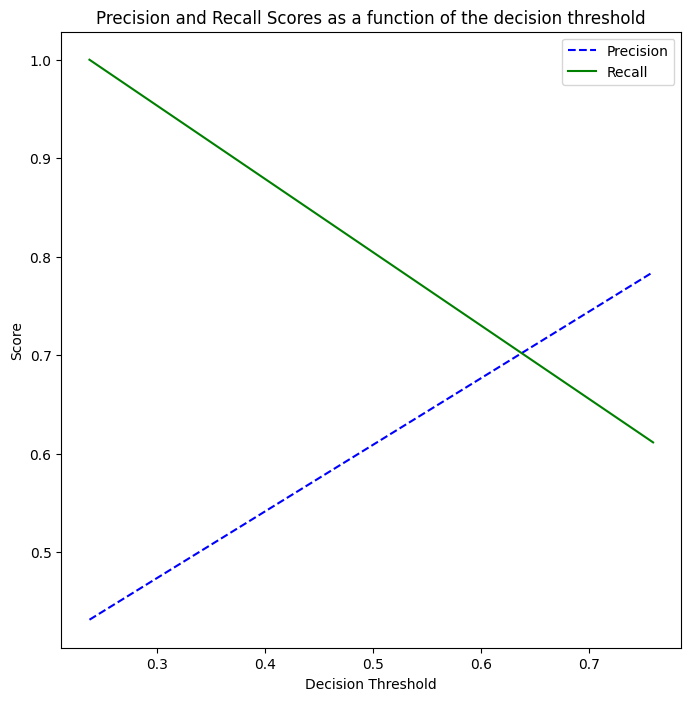

In [ ]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]
p, r, thresholds = precision_recall_curve(y_test, y_scores)
plot_precision_recall_vs_threshold(p, r, thresholds)

In [97]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.7419778777369942


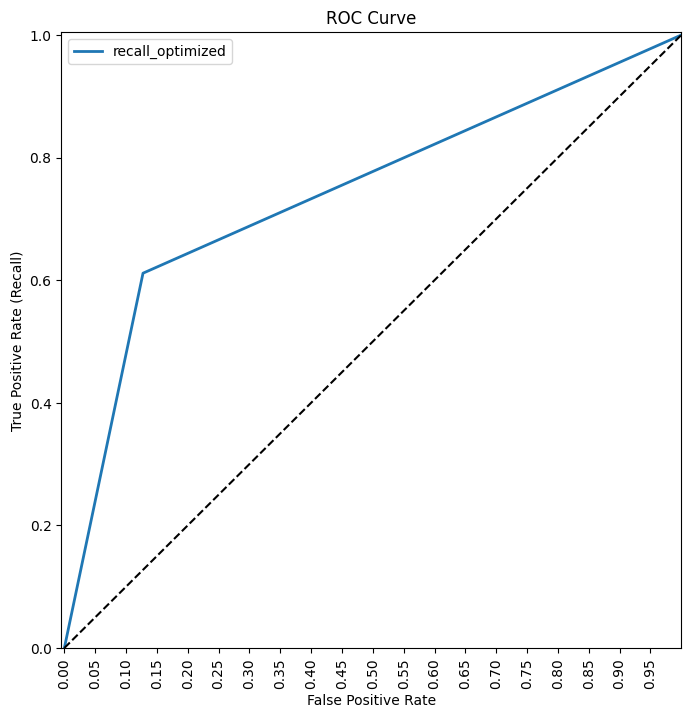

In [98]:
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')